# Classification using Sklearn

In [1]:
import sklearn

/Users/yangminyue/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('smsspamcollection.tsv',sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.shape

(5572, 4)

**check for missing values**

In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

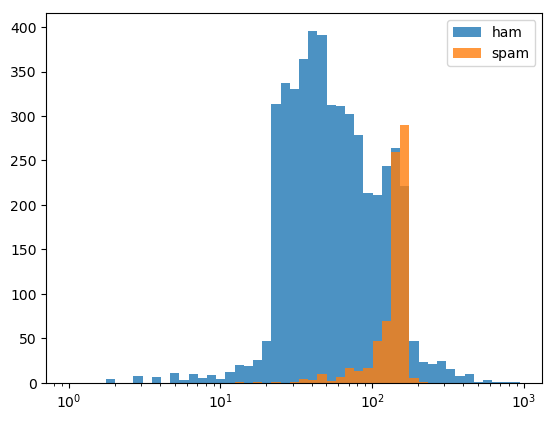

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# x轴比例设置为对数
plt.xscale('log')
bins=1.15**(np.arange(0,50))
# plt.hist(x,...) 画直方图
    # x: 数据
    # bins: 直方图的柱数
    # alpha: 透明度
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [16]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

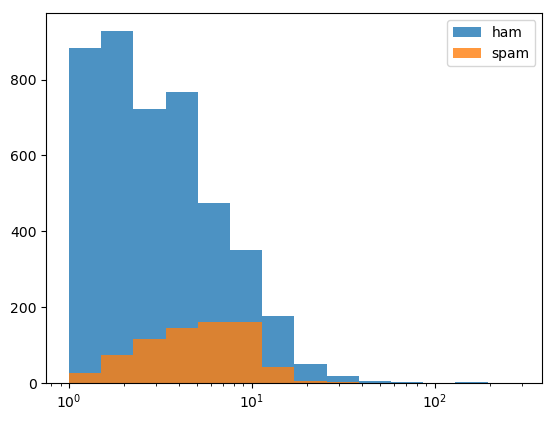

In [19]:
plt.xscale('log')
bins=1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

### split dataset into train and test

In [20]:
X=df[['length','punct']]
y=df['label']

In [21]:
X.head()

,length,punct
0,111,9
1,29,6
2,155,6
3,49,6
4,61,2


In [22]:
X.shape

(5572, 2)

In [23]:
y.shape

(5572,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [26]:
X_train.shape

(3733, 2)

In [27]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(X_train,y_train)

/Users/yangminyue/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
prediction=lr.predict(X_test)

**test accuracy of the model**

In [32]:
from sklearn import metrics

In [36]:
metrics.confusion_matrix(y_test,prediction)

array([[1547,   46],
       [ 241,    5]])

In [37]:
df=pd.DataFrame(metrics.confusion_matrix(y_test,prediction),index=['ham','spam'],columns=['ham','spam'])
df

,ham,spam
ham,1547,46
spam,241,5


In [38]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

   micro avg       0.84      0.84      0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



### Support Vector Machine (SVM) classififer from sklearn

In [39]:
from sklearn.svm import SVC
svc_model=SVC(gamma='auto')
svc_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
predictions=svc_model.predict(X_test)

In [44]:
df=pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])
df

,ham,spam
ham,1515,78
spam,131,115


In [45]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.94      1593
        spam       0.60      0.47      0.52       246

   micro avg       0.89      0.89      0.89      1839
   macro avg       0.76      0.71      0.73      1839
weighted avg       0.88      0.89      0.88      1839



SVM works much better

# Text Feature Extraction

### count vectorization

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()

In [48]:
messages=['Hey, lets go to the game today.','Call your sister.','Want to go walk your dog?']
count=vect.fit_transform(messages)
print(vect.get_feature_names())

['call', 'dog', 'game', 'go', 'hey', 'lets', 'sister', 'the', 'to', 'today', 'walk', 'want', 'your']


In [49]:
print(count.todense())

[[0 0 1 1 1 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 1 0 1 0 0 0 0 1 0 1 1 1]]


### TF-IDF Vectorizer

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
vect=TfidfVectorizer()
dtm=vect.fit_transform(messages)

In [55]:
df=pd.read_csv('smsspamcollection.tsv',sep='\t')

In [56]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


split data

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X=df['message']
y=df['label']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

count vectorizer

In [60]:
count_vect=CountVectorizer()

In [61]:
X_train_counts=count_vect.fit_transform(X_train)

In [62]:
X_train_counts.shape

(3900, 7263)

In [63]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer()

In [64]:
X_train_tfidf =tfidf_transformer.fit_transform(X_train_counts)

In [65]:
X_train_tfidf.shape

(3900, 7263)

In [66]:
from sklearn.svm import LinearSVC
clf=LinearSVC()

In [67]:
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

using pipeline from sklearn

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

text_clf_pipeline=Pipeline([('tfidf-vect', TfidfVectorizer()),('clf',LinearSVC())])

In [69]:
text_clf_pipeline.fit(X_train,y_train)

/Users/yangminyue/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


Pipeline(memory=None,
     steps=[('tfidf-vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

test using pipeline objects

In [70]:
predictions= text_clf_pipeline.predict(X_test)

In [71]:
metrics.confusion_matrix(y_test,predictions)

array([[1445,    3],
       [  10,  214]])

In [72]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1448
        spam       0.99      0.96      0.97       224

   micro avg       0.99      0.99      0.99      1672
   macro avg       0.99      0.98      0.98      1672
weighted avg       0.99      0.99      0.99      1672



In [73]:
metrics.accuracy_score(y_test,predictions)

0.9922248803827751

In [74]:
text_clf_pipeline.predict(['Hello, how are you?'])

array(['ham'], dtype=object)

In [75]:
text_clf_pipeline.predict(['Congratulations, you have won a holiday to USA.'])

array(['spam'], dtype=object)

# Text Classification Project

In [76]:
import numpy as np
import pandas as pd

df=pd.read_csv('moviereviews.tsv',sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [77]:
df.shape

(2000, 2)

**Preparations**

In [78]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [79]:
df.dropna(inplace=True)

In [80]:
df.shape

(1965, 2)

In [81]:
blanks=[]
for index,label,review in df.itertuples():
    if type(review)==str:
        if review.isspace():
            blanks.append(index)

print(blanks)

[57, 71, 147, 151, 283, 307, 313, 323, 343, 351, 427, 501, 633, 675, 815, 851, 977, 1079, 1299, 1455, 1493, 1525, 1531, 1763, 1851, 1905, 1993]


In [82]:
len(blanks)

27

In [84]:
df.drop(blanks,inplace=True)

In [85]:
df.shape

(1938, 2)

In [86]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

### split data

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X=df['review']
y=df['label']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Pipeline

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [97]:
# pipeline 1 with NB
text_clf_nb=Pipeline([('tfidf',TfidfVectorizer()),('clf',MultinomialNB())])

# pipeline 2 with SVC
text_clf_svc=Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

## First pipeline: NB

### Fit

In [98]:
text_clf_nb.fit(X_train,y_train)

/Users/yangminyue/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [99]:
predictions=text_clf_nb.predict(X_test)

### Scores

In [100]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [102]:
print(accuracy_score(y_test,predictions))

0.7640625


In [103]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.69      0.93      0.79       308
         pos       0.91      0.61      0.73       332

   micro avg       0.76      0.76      0.76       640
   macro avg       0.80      0.77      0.76       640
weighted avg       0.80      0.76      0.76       640



In [104]:
print(confusion_matrix(y_test,predictions))

[[287  21]
 [130 202]]


## Second Pipeline: SVC

In [105]:
text_clf_svc.fit(X_train,y_train)
predictions2=text_clf_svc.predict(X_test)

/Users/yangminyue/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


In [106]:
print(accuracy_score(y_test,predictions2))

0.846875


In [107]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

   micro avg       0.85      0.85      0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640



In [108]:
print(confusion_matrix(y_test,predictions2))

[[259  49]
 [ 49 283]]
